<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e9504fc03477068591d321ae1389a230b5dd2beb74b86971caa66996b8fb5502
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-24-7e283aa80b8e>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-24-7e283aa80b8e>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-24-7e283aa80b8e>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


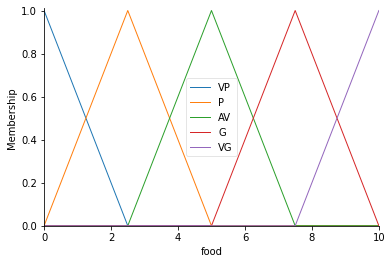

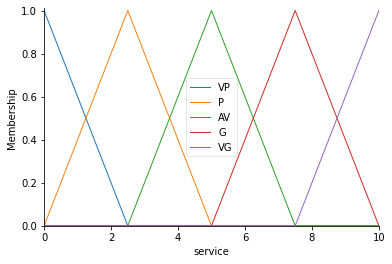

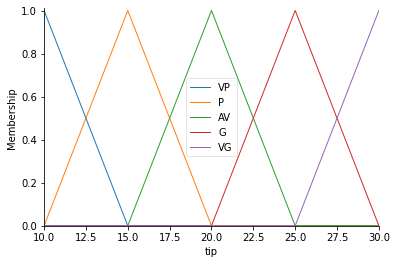

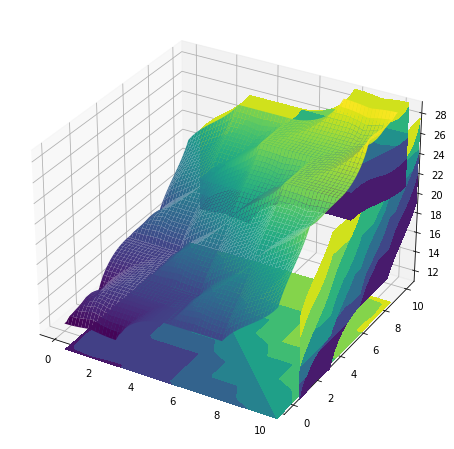

In [24]:

from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from mpl_toolkits.mplot3d import axis3d
import matplotlib.pyplot as plt

    
universe1 = np.linspace(0,10,61)
universe2 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe1, 'food')
service  = ctrl.Antecedent(universe1, 'service')
tip = ctrl.Consequent(universe2, 'tip')
name1 = ['VP', 'P', 'AV', 'G', 'VG']     


food .automf(names = name1)
service .automf(names = name1)
tip.automf(names = name1)


rule0 = ctrl.Rule(antecedent = (
                                (food['VP'] & service['VP'])| 
                                (food['VP'] & service['P'])| 
                                (food['P'] & service['VP'])), 
                                consequent = tip['VP'], label = 'rule VP')

rule1 = ctrl.Rule(antecedent = ((food ['G'] & service['VP'])|
                                (food ['AV'] & service['VP'])|
                                (food ['AV'] & service['P'])| 
                                (food ['P'] & service['P'])| 
                                (food ['P'] & service['AV'])|
                                (food ['VP'] & service['AV'])|
                                (food ['VP'] & service['G'])), 
                                consequent = tip['P'], label = 'rule P')

rule2 = ctrl.Rule(antecedent = (( food ['VG'] & service['VP'])| 
                                (food ['G'] & service['P'])| 
                                (food ['AV'] & service['AV'])|
                                (food ['P'] & service['G'])|
                                (food ['VP'] & service['VG'])), 
                                consequent = tip['AV'], label = 'rule AV') 

rule3 = ctrl.Rule(antecedent = ((food ['VG'] & service['P'])| 
                                (food ['VG'] & service['AV'])| 
                                (food ['G'] & service['AV'])|
                                (food ['G'] & service['G'])|
                                (food ['AV'] & service['G'])|
                                (food ['AV'] & service['VG'])|
                                (food ['P'] & service['VG'])), 
                                consequent = tip['G'], label = 'rule G')

rule4 = ctrl.Rule(antecedent = ((food ['VG'] & service['G'])| 
                                (food ['VG'] & service['VG'])| 
                                (food ['G'] & service['VG'])), 
                                consequent = tip['VG'], label = 'rule VG')
     
food.view()
service.view()
tip.view()
system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run =61 * 61 + 1)
upsampled = np.linspace(0,10,61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)   
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',   linewidth = 0.4, antialiased = True)                 
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 300)




                                
              

<ipython-input-45-83c2b7d742c6>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'plasma', anpha = 0.5)
<ipython-input-45-83c2b7d742c6>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'plasma', anpha = 0.5)
<ipython-input-45-83c2b7d742c6>:79: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'plasma', anpha = 0.5)


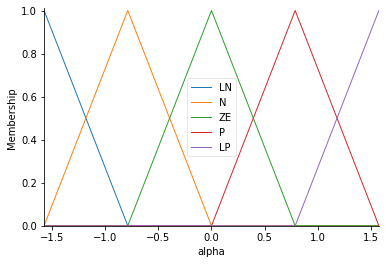

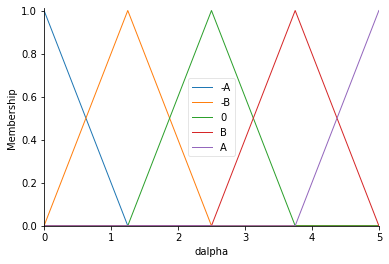

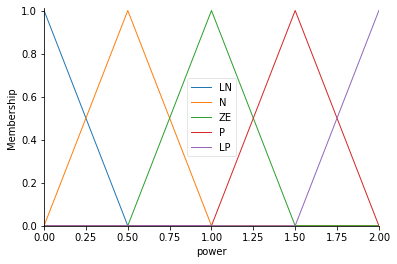

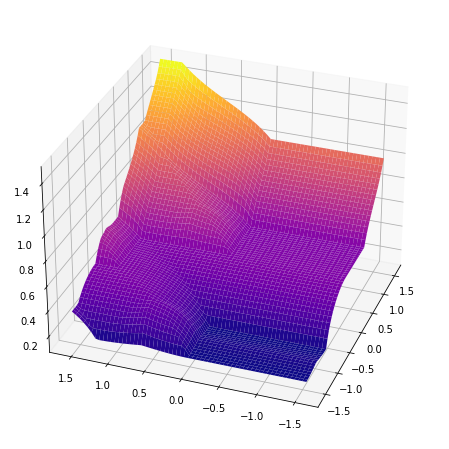

In [45]:

from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from mpl_toolkits.mplot3d import axis3d
import matplotlib.pyplot as plt
import math
   
universe0 = np.linspace(-(math.pi/2), (math.pi/2), 61)
universe1 = np.linspace(0,5,61)
universe2 = np.linspace(0,2,61)
alpha = ctrl.Antecedent(universe0, 'alpha')
dalpha  = ctrl.Antecedent(universe1, 'dalpha')
power = ctrl.Consequent(universe2, 'power')
name1 = ['LN', 'N', 'ZE', 'P', 'LP']     
name2 = ['-A', '-B', '0', 'B', 'A']

alpha .automf(names = name1)
dalpha.automf(names = name2)
power.automf(names = name1)


rule0 = ctrl.Rule(antecedent = (
                                (alpha['LN'] & dalpha['-B'])| 
                                (alpha['LN'] & dalpha['-A'])| 
                                (alpha['N'] & dalpha['-A'])), 
                                consequent = power['LN'], label = 'rule LN')

rule1 = ctrl.Rule(antecedent = ((alpha ['P'] & dalpha['-A'])|
                                (alpha ['ZE'] & dalpha['-A'])|
                                (alpha ['ZE'] & dalpha['-B'])| 
                                (alpha ['N'] & dalpha['-B'])| 
                                (alpha ['N'] & dalpha['0'])|
                                (alpha ['LN'] & dalpha['0'])|
                                (alpha ['LN'] & dalpha['B'])), 
                                consequent = power['N'], label = 'rule N')

rule2 = ctrl.Rule(antecedent = (( alpha ['LN'] & dalpha['A'])| 
                                (alpha ['N'] & dalpha['B'])| 
                                (alpha ['ZE'] & dalpha['0'])|
                                (alpha ['P'] & dalpha['-B'])|
                                (alpha ['LP'] & dalpha['-A'])), 
                                consequent = power['ZE'], label = 'rule ZE') 

rule3 = ctrl.Rule(antecedent = ((alpha ['LN'] & dalpha['A'])| 
                                (alpha ['N'] & dalpha['A'])| 
                                (alpha ['N'] & dalpha['B'])|
                                (alpha ['P'] & dalpha['B'])|
                                (alpha ['P'] & dalpha['0'])|
                                (alpha ['LP'] & dalpha['0'])|
                                (alpha ['LP'] & dalpha['-B'])), 
                                consequent = power['P'], label = 'rule P')

rule4 = ctrl.Rule(antecedent = ((alpha ['P'] & dalpha['A'])| 
                                (alpha ['LP'] & dalpha['A'])| 
                                (alpha ['LP'] & dalpha['B'])), 
                                consequent = power['LP'], label = 'rule LP')
     
alpha.view()
dalpha.view()
power.view()
system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61 + 1)
upsampled = np.linspace(-(math.pi/2), (math.pi/2), 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)   
for i in range(61):
  for j in range(61):
    sim.input['alpha'] = x[i, j]
    sim.input['dalpha'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['power']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'plasma',   linewidth = 0.4, antialiased = True)                 
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'plasma', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'plasma', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'plasma', anpha = 0.5)
ax.view_init(30, 200)




                                
              